$\newcommand{\ds}{\displaystyle}$
# The Derivative
## Definition of the derivative
We will first define the average rate of change, then the instantaneous rate of change, which is the derivative.

### Average rate of change
Suppose you have a class at the Burnaby campus in the morning and another class at the downtown campus in the afternoon. You leave the Burnaby campus at 12:00 and arrives at the downtown campus at 12:48. Since the distance between the two campuses is approximately 11 km, the average speed (i.e., the *average rate of change* in position or displacement) is
\begin{align*}
v = \frac{\text{Change in position}}{\text{Change in time}}
=\frac{11\, \text{km}}{48\,\text{min}} = \frac{11\, \text{km}}{48\,\text{min}}\cdot \frac{60\, \text{min}}{1.0\,\text{hour}} = 13.75\, \text{km/h}.
\end{align*}

$\def\Dx{\varDelta x}$
In general, the average rate of change in the quantity $y(x)$ is
\begin{align*}
\frac{\text{Change in } y}{\text{Change in }x} = \frac{\varDelta y}{\Dx} 
= \frac{y(x+\Dx)-y(x)}{\Dx}.
\end{align*}
The figure below shows that the average rate of change in $y$ is the **slope** of the secant line between two points $(x,\, y(x))$ and $\left(x+\Dx,\, y(x+\Dx)\right)$. In this example, we take $x=1$ and $\Dx = 0.25,\,0.5$ and $0.75$.

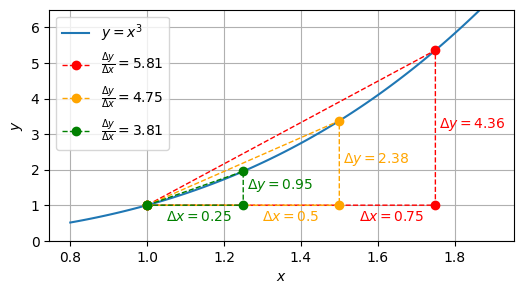

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,3))

x = np.linspace(0.8, 1.9, 100)
def y(x): return x**3
plt.plot(x, y(x), label=r'$y=x^3$')

def AROC(interval, color): #Average Rate Of Change
    x0, x1 = interval
    dx = x1 - x0
    xr = [x0, x1, x1, x0]
    y0 = y(x0); y1 = y(x1); dy = y1-y0
    yr = [y0, y1, y0, y0]
    plt.plot(xr, yr, marker='o', linestyle='dashed', linewidth=1, color=color, 
             label=r'$\frac{\Delta y}{\Delta x} = $'+str( round(dy/dx,2) ) ) 
    plt.text(x1+0.01, (y0+y1)/2, r'$\Delta y = $'+str(round(dy,2)), fontdict={'color':color} )
    plt.text(x1-0.2, y0-0.45, r'$\Delta x = $'+str(round(dx,2)), fontdict={'color':color} )

AROC([1.0,1.75], 'red')
AROC([1.0,1.5], 'orange')
AROC([1.0,1.25], 'green')

plt.ylim(0,6.5); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.grid(); plt.legend(); plt.show()

As you can see, the slope of a secant line depends on the location and the interval in $x$. What do you think will happen to the value of $\varDelta y/\Dx$ as $\Dx$ becomes smaller and smaller?

(sec-IROC)=
### Instantaneous rate of change
Continuing with the example above, let's compute more values of slope for different values of $\Dx$. Click "Show code cell output" below the code to see the result of the code snippet.

$$~$$(code-test)

In [2]:
#Convergence of Δy/Δx as Δx->0
def y(x): return x**3

for n in range(27):
    Δx = 2**(-n) 
    Δy = y(1+Δx)-y(1)
    slope = Δy/Δx
    print("Δx = %1.8f, slope=%1.8f" % (Δx, slope) )

Δx = 1.00000000, slope=7.00000000
Δx = 0.50000000, slope=4.75000000
Δx = 0.25000000, slope=3.81250000
Δx = 0.12500000, slope=3.39062500
Δx = 0.06250000, slope=3.19140625
Δx = 0.03125000, slope=3.09472656
Δx = 0.01562500, slope=3.04711914
Δx = 0.00781250, slope=3.02349854
Δx = 0.00390625, slope=3.01173401
Δx = 0.00195312, slope=3.00586319
Δx = 0.00097656, slope=3.00293064
Δx = 0.00048828, slope=3.00146508
Δx = 0.00024414, slope=3.00073248
Δx = 0.00012207, slope=3.00036623
Δx = 0.00006104, slope=3.00018311
Δx = 0.00003052, slope=3.00009155
Δx = 0.00001526, slope=3.00004578
Δx = 0.00000763, slope=3.00002289
Δx = 0.00000381, slope=3.00001144
Δx = 0.00000191, slope=3.00000572
Δx = 0.00000095, slope=3.00000286
Δx = 0.00000048, slope=3.00000143
Δx = 0.00000024, slope=3.00000072
Δx = 0.00000012, slope=3.00000036
Δx = 0.00000006, slope=3.00000018
Δx = 0.00000003, slope=3.00000009
Δx = 0.00000001, slope=3.00000004


Do you see that the value of the slope appear to *coverge* to $3.0000\cdots$? 
This is the *instantaneous rate of change*, or the slope of the <b title="the unique line that touches the curve at one point.">*tangent line*</b> at $x=1$. The following animation shows it graphically, i.e., the secant line converges to the tangent line as $\Dx$ approaches zero.

In [3]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.6, 1.9, 50)
y = lambda x: x**3

fig = plt.figure(figsize=(6,3))
ax = plt.axes(xlim =(0.7, 1.9), ylim =(0, 6.5), xlabel='$x$', ylabel='$y$')
ax.grid();

line0, = ax.plot(x, y(x), lw = 2)
line, = ax.plot([],[], marker='o')
slope = ax.text(1.9, 0, '')
plt.close(fig)

def animate(i):
    sec_y = lambda m,x: m*x + 1 - m
    x0 = 1; x1 = 1.0 + 0.75/1.085**i; dx = x1 - x0
    y0 = 1; y1 = y(x1); dy = y1 - y0
    xL = 0.5; xR = 2.5
    yL = sec_y(dy/dx,xL); yR = sec_y(dy/dx,xR)
    line.set_data([xL, x0, x1, x1, x0, xR], [yL, y0, y1, y0, y0, yR])
    slope.set_position((x1+0.02, y0-0.5))
    slope.set_text(r'$\frac{\Delta y}{\Delta x} = \frac{%1.5f}{%1.5f}=%1.3f$' % (dy, dx, dy/dx))
    return line0, line, slope
 
anim = animation.FuncAnimation(fig, animate,  frames = 108, interval = 300, blit = True)

from IPython.display import HTML
HTML(anim.to_jshtml())


Note that the tangent line touches the curve at a single point $x=1$.  The slope of the tangent line is the instantaneous rate of change in $y$, a.k.a. the derivative of the function $y(x)$ at $x=1$.

Thus, we can write the general definition of the derivative of an arbitrary function $f(x)$:
```{admonition} Important formula!
:class: important-formula
$$
\frac{df}{dx} = \lim_{\Dx\to 0}\frac{f(x+\Dx)-f(x)}{\Dx}.
$$(derivative_def)
```
There are many different notations for the derivative of $f(x)$:

$$
\frac{df}{dx} = f'(x) = \dot{f}(x) = Df(x)
$$(derivative-notations)

We will mostly use $\frac{df}{dx}$ and $f'(x)$ interchangeably in this course. 
The derivative of $f(x)$ at a particular value of $x$, e.g., $x=3$ is denoted as 

$$
f'(3) ~~~ \text{or} ~~~ \left.\frac{df}{dx}\right|_{x=3}
$$

#### Examples/Exercises 

(a)  Estimate the derivative of $\sin x$ at $x=0$ using the formula {eq}`derivative_def` by setting $\Dx$ equal to a very small number. If you are using a hand-held calculator, make sure to set it to the *radian mode*. In Python, use `numpy.sin()` or `math.sin()`, which take arguments in radians.
```{admonition} Answer
:class: dropdown
$$
\frac{\sin(1+\Dx) - \sin(1)}{\Dx} \to 1~~ \text{ as }\Dx\to 0
$$
```

(b)  Compute the derivative of $4\tan^{-1}(x)$ using Code {eq}`code-test`. In Python, $\tan^{-1}()$ is `numpy.arctan()` or `math.atan()`.
```{admonition} Answer
:class: dropdown
$$
\frac{4\tan^{-1}(1+\Dx) - 4\tan^{-1}(1)}{\Dx} \to \pi~~ \text{ as }\Dx\to 0
$$
```

## Numerical differentiation: Finite difference

In this section, we will take a look at a couple of different methods to numerically differentiate functions, refered to as *finite difference*. 

### Newton's quotient

First, let us implement the formula {eq}`derivative_def` straightforwardly, which is sometimes called *Newton's difference quotient*:

$$~$$(code-diff1)

In [4]:
def diff1(f, x, dx):
    return ( f(x+dx)-f(x) ) / dx

We can use this code to compute the derivative of an arbitrary function. Consider the following situation:

Suppose we want the volume of water in a bathtub increases as

$$
V(t) = 120(1-e^{-t/15})~~\text{[litres]}, ~~\text{where}~ t~ \text{in minutes}
$$(eq-volume-in-tub)

so that the water will not overflow as shown in the graph below.

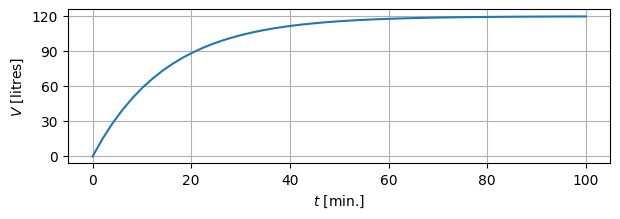

In [5]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,100)
V = 120.*(1-np.exp(-t/15.))
plt.figure(figsize=(7,2)); plt.grid()
plt.plot(t,V)
plt.yticks([0, 30, 60, 90, 120])
plt.xlabel("$t$ [min.]"); plt.ylabel("$V$ [litres]");

As you can see, the volume saturates at 120 litres.

Now, in order to realise this, we need to adjust the rate of water flowing into the tub, i.e., the valve should be fully open at the beginning and it gradually closes so that $V$ will not go over 120 litres. Since the definition of flow rate is 

$$
\frac{\text{Change in volume}}{\text{Change in time}}
=\frac{\varDelta V}{\varDelta t} \to \frac{dV}{dt},
$$

we simply have to differentiate Eq. {eq}`eq-volume-in-tub` at **each point** in time to find how we should adjust the flow rate. Let's do this using the function `diff1()` we defined above.

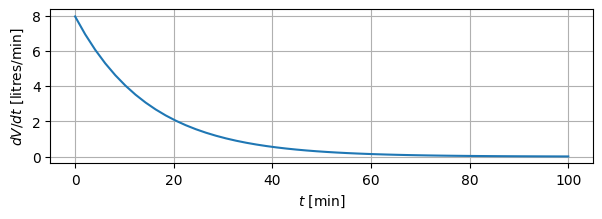

In [6]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1 # Observe that the result won't change much by making dt smaller. 
def V(t): return 120.*(1-np.exp(-t/15.))
def dVdt(t): return diff1(V, t, dt) # Derivative at time t

t = np.linspace(0,100) # Compute dVdt at t=0,1,2,3,...,99 min.
plt.figure(figsize=(7,2)); plt.grid()
plt.plot(t,dVdt(t))
plt.xlabel("$t$ [min]"); plt.ylabel("$dV/dt$ [litres/min]");

Thus, we find that by smoothly adjusting the flow rate from 8 litres/min 
at $t=0$ down to zero, we can increase the volume according to Eq. {eq}`eq-volume-in-tub`.

In this simple case, it appears to be a perfectly good way to compute derivatives. It turns out to be computationally expensive and imprecise compared to other methods. We will explore some of the practical problems with these finite difference methods. 

### Symmetric difference quotient

Let's look at another finite difference method:

$$~$$(code-diff2)

In [7]:
def diff2(f, x, dx):
    return ( f(x+dx/2)-f(x-dx/2) ) / dx

This is called the symmetric difference quotient. The following animation illustrates how it works.  Compare this with the animation in {numref}`sec-IROC`, which is computed using `diff1()`.

In [8]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.3, 1.5, 50)
y = lambda x: x**3

fig = plt.figure(figsize=(6,3))
ax = plt.axes(xlim =(0.5, 1.5), ylim =(-0.5, 3.5), xlabel='$x$', ylabel='$y$')
ax.grid();

line0, = ax.plot(x, y(x), lw = 2)
line0, = ax.plot([1],[1], marker='o')
line, = ax.plot([],[], marker='o')
slope = ax.text(1.9, 0, '')
plt.close(fig)

def animate(i):
    dx = 0.75/1.085**i
    x0 = 1.0-dx/2; x1 = 1.0 + dx/2; 
    y0 = y(x0); y1 = y(x1); dy = y1 - y0
    sec_y = lambda m,x: m*(x-x0) + y0
    xL = 0; xR = 1.6
    yL = sec_y(dy/dx,xL); yR = sec_y(dy/dx,xR)
    line.set_data([xL, x0, x1, x1, x0, xR], [yL, y0, y1, y0, y0, yR])
    slope.set_position((x1-0.02, y0-0.4))
    slope.set_text(r'$\frac{\Delta y}{\Delta x} = \frac{%1.5f}{%1.5f}=%1.3f$' % (dy, dx, dy/dx))
    return line0, line, slope
 
anim = animation.FuncAnimation(fig, animate,  frames = 108, interval = 300, blit = True)

from IPython.display import HTML
HTML(anim.to_jshtml())

These two numerical differentiation algorithms `diff1()` and `diff2()` are very similar, but it turns out that `diff2()` is quite a bit more precise compared to `diff1()` as shown in the graph below. It shows the errors as a function of `dx`:

$$
\text{Error} = \bigg|(\text{numerical result}) - (\text{exact result})\bigg|
$$

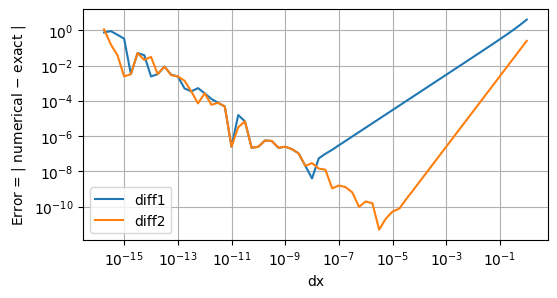

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): return x**3
def dfexact(x): return 3*x**2 #Exact derivative
x0 = 1.0 #Find the derivative at x0

dxa = 10.0**(-np.arange(0,16,0.25)) #array of dx values
e1 = [] #array of errors with diff1
e2 = [] #array of errors with diff2
for dx in dxa:
    e1.append( abs( diff1(f,x0,dx)-dfexact(x0) ) )
    e2.append( abs( diff2(f,x0,dx)-dfexact(x0) ) )

plt.figure(figsize=(6,3)); 
plt.loglog(dxa, e1, label="diff1"); plt.loglog(dxa, e2, label="diff2")
plt.legend(); plt.xlabel("dx"); plt.ylabel("Error = $|$ numerical $-$ exact $|$")
plt.grid(); plt.show()

As you can see, `diff2()`'s errors are much smaller for $\text{dx}>10^{-5}$. 
In both cases, the error decreases as dx becomes smaller until it hits the bottom. The reason why the errors increase as dx is further reduced is due to underflow in the subtraction operation in the algorithms.  It is demonstrated below:

In [10]:
dy_numerical = 1.000000000000000123 - 1.0 # Numerical result
dy_exact = 1.23e-16 # Exact result
print("dy_numerical = ", dy_numerical)
print("dy_exact = ", dy_exact)
error = (dy_numerical - dy_exact) / dy_exact * 100
print("Relative error = %2.1f percent" % error )

dy_numerical =  2.220446049250313e-16
dy_exact =  1.23e-16
Relative error = 80.5 percent


## Derivatives of elementary functions

### Derivative of a constant

The derivative of a constant function $C$, i.e., $C$ does not change when $x$ changes, is

$$
\frac{dC}{dx} = \lim_{\Dx\to 0}\frac{C -C}{\Dx} = 0.
$$

In other words, the slope of the graph of $y = C$ is zero for all values of $x$.


### Derivative of a linear function

The derivative of a linear function $mx+b$ ($m$ and $b$ are constant) is

$$
\frac{d}{dx}(mx+b) = \lim_{\Dx\to 0}\frac{m(x+\Dx)+b - (mx+b))}{\Dx} = m
$$

In other words, the slope of the graph of $y = mx+b$ is $m$ for all values of $x$.


### Derivative of a degree-$n$ polynomial

Consider a degree-4 polynomial shown below:

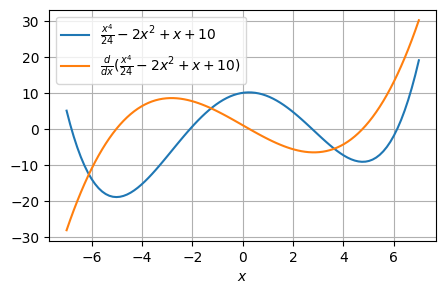

In [11]:
import matplotlib.pyplot as plt
from numpy import linspace
def diff(f, x, dx): return ( f(x+dx/2)-f(x-dx/2) ) / dx

def f(x): return x**4/24 -2*x**2 +x+10
x = linspace(-7, 7, 100)
plt.figure(figsize=(5,3))
plt.plot(x, f(x), label=r"$\frac{x^4}{24} -2x^2 +x+10$")
plt.plot(x, diff(f, x, 0.1), label=r"$\frac{d}{dx}(\frac{x^4}{24} -2x^2 +x+10)$")
plt.xlabel("$x$"); plt.legend(); plt.grid(); plt.show()

The derivative has one fewer "trough".  In general

$$
\frac{d}{dx}(\text{Degree-}n\text{ polynomial})
= (\text{Degree-}(n-1)\text{ polynomial})
$$

### Derivative of the sine function

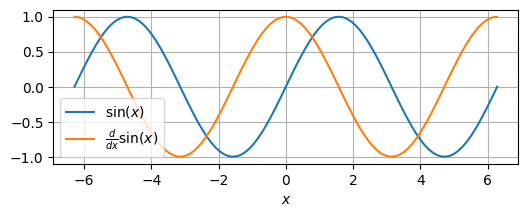

In [12]:
import matplotlib.pyplot as plt
from numpy import pi, sin, linspace
def diff(f, x, dx): return ( f(x+dx/2)-f(x-dx/2) ) / dx
x = linspace(-2*pi, 2*pi, 100)
plt.figure(figsize=(6,2))
plt.plot(x, sin(x), label=r"$\sin(x)$")
plt.plot(x, diff(sin, x, 0.1), label=r"$\frac{d}{dx}\sin(x)$")
plt.xlabel("$x$"); plt.legend(); plt.grid(); plt.show()

The derivative of $\sin x$ is 1 at $x=0$ and it decreases as $x$ increases.  
Also, its shape is identical to $\sin x$ and its period appears to be $2\pi$. Thus, we conclude

```{admonition} Important formula!
:class: important-formula
$$
\frac{d}{dx}\sin x = \cos x
$$
```

### Derivative of the cosine function

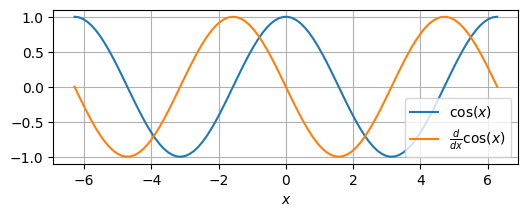

In [13]:
import matplotlib.pyplot as plt
from numpy import pi, cos, linspace
def diff(f, x, dx): return ( f(x+dx/2)-f(x-dx/2) ) / dx
x = linspace(-2*pi, 2*pi, 100)
plt.figure(figsize=(6,2))
plt.plot(x, cos(x), label=r"$\cos(x)$")
plt.plot(x, diff(cos, x, 0.1), label=r"$\frac{d}{dx}\cos(x)$")
plt.xlabel("$x$"); plt.legend(); plt.grid(); plt.show()

The derivative of $\cos x$ is 0 at $x=0$ and it decreases as $x$ increases.  
Also, its shape is identical to $\cos x$ and its period appears to be $2\pi$. Thus, we conclude

```{admonition} Important formula!
:class: important-formula
$$
\frac{d}{dx}\cos x = -\sin x
$$
```

### Derivative of the exponential function

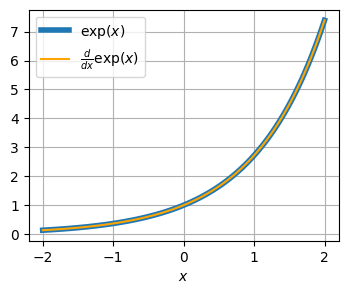

In [14]:
import matplotlib.pyplot as plt
from numpy import exp, linspace
def diff(f, x, dx): return ( f(x+dx/2)-f(x-dx/2) ) / dx
x = linspace(-2, 2, 100)
plt.figure(figsize=(4,3))
plt.plot(x, exp(x), label=r"$\exp(x)$", lw=4)
plt.plot(x, diff(exp, x, 0.1), label=r"$\frac{d}{dx}\exp(x)$", lw=1.5, color="orange")
plt.xlabel("$x$"); plt.legend(); plt.grid(); plt.show()

The derivative of $e^x$ is $e^x$! In fact the base 
$e = 2.718281828459\cdots$ is chosen to make $(e^x)' = e^x$.

```{admonition} Important formula!
:class: important-formula
$$
\frac{d}{dx}e^x = e^x
$$
```

### Derivative of the logarithmic function

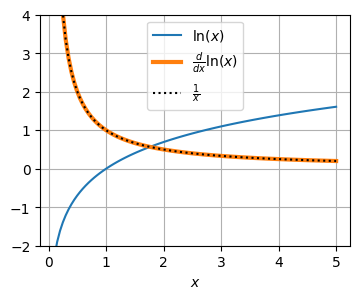

In [15]:
import matplotlib.pyplot as plt
from numpy import log, linspace
def diff(f, x, dx): return ( f(x+dx/2)-f(x-dx/2) ) / dx
x = linspace(0.1, 5, 100)
plt.figure(figsize=(4,3)); plt.ylim([-2,4])
plt.plot(x, log(x), label=r"$\ln(x)$")
plt.plot(x, diff(log, x, 0.01), label=r"$\frac{d}{dx}\ln(x)$", lw=3)
plt.plot(x, 1/x, linestyle="dotted", label=r"$\frac{1}{x}$", color="k")
plt.xlabel("$x$"); plt.legend(); plt.grid(); plt.show()

The derivative of the natural logarithm $\ln x$ is $\ds\frac{1}{x}$ 
as shown in the graph.

```{admonition} Important formula!
:class: important-formula
$$
\frac{d}{dx}\ln x = \frac{1}{x}, ~~~\text{for}~~ x>0
$$
```

#### Examples/Exercises 

Make a rough sketch of the derivative of each of the following functions just by observing how the slope changes. To check your answer, run the code with `derivative=True`. 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
def diff(f, x, dx): return ( f(x+dx/2)-f(x-dx/2) ) / dx

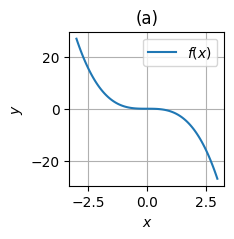

In [17]:
derivative=False
x = linspace(-3,3, 100); f = lambda x: -x**3
plt.figure(figsize=(2,2)); plt.title('(a)'); #plt.ylim(ylim);
plt.plot(x, f(x), label=r"$f(x)$")
if derivative: plt.plot(x, diff(f, x, 0.01), label=r"$\frac{df}{dx}$")
plt.ylabel("$y$"); plt.xlabel("$x$"); plt.legend(); plt.grid(); 
plt.show();

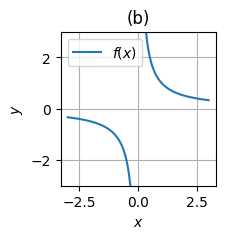

In [18]:
derivative=False
xn = linspace(-3,-0.1, 100); xp =  linspace(0.1,3, 100);
f = lambda x: 1/x
plt.figure(figsize=(2,2)); plt.title('(b)'); plt.ylim([-3,3]);
plt.plot(xn, f(xn), label=r"$f(x)$", color="#1f77b4")
plt.plot(xp, f(xp), color="#1f77b4")
if derivative: 
    plt.plot(xn, diff(f, xn, 0.01), label=r"$\frac{df}{dx}$", color="orange")
    plt.plot(xp, diff(f, xp, 0.01), color="orange" )
plt.ylabel("$y$"); plt.xlabel("$x$"); plt.legend(); plt.grid(); 
plt.show();

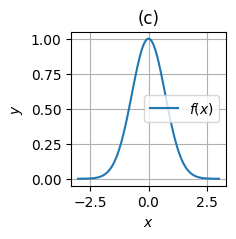

In [19]:
derivative=False
x = linspace(-3,3, 100); f = lambda x: np.exp(-x**2)
plt.figure(figsize=(2,2)); plt.title('(c)'); #plt.ylim(ylim);
plt.plot(x, f(x), label=r"$f(x)$")
if derivative: plt.plot(x, diff(f, x, 0.01), label=r"$\frac{df}{dx}$")
plt.ylabel("$y$"); plt.xlabel("$x$"); plt.legend(); plt.grid(); 
plt.show();

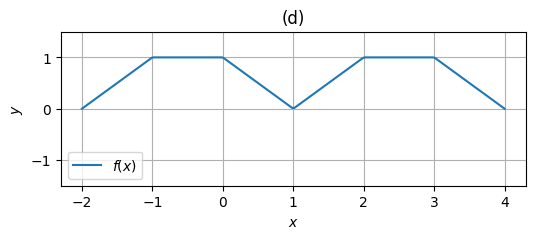

In [20]:
derivative=False
x = linspace(-2,4, 200); 
def fr(x):
    s = np.floor(x)%3
    if s==0: return 1-(x-np.floor(x))
    elif s==1: return (x-np.floor(x))
    else: return 1.0
f = np.vectorize(fr)
plt.figure(figsize=(6,2)); plt.title('(d)'); plt.ylim([-1.5,1.5]);
plt.plot(x, f(x), label=r"$f(x)$")
if derivative: plt.plot(x, diff(f, x, 0.01), label=r"$\frac{df}{dx}$")
plt.ylabel("$y$"); plt.xlabel("$x$"); plt.legend(); plt.grid(); 
plt.show();